# PROJECT OVERVIEW

Sentiment analysis is a natural language processing (NLP) task that involves determining
whether a given text expresses a positive or negative sentiment. In this project, we will
analyze movie reviews from the IMDb dataset and predict the sentiment (positive or
negative) based on the text of the reviews. By leveraging various text preprocessing
techniques, feature extraction methods, and classification algorithms, this project will
develop a machine learning model capable of accurately predicting the sentiment of movie
reviews. The insights derived from this analysis can be useful for movie producers, critics,
and platforms like IMDb to understand public opinion and tailor marketing or content
strategies accordingly.

# PROBLEM STATEMENT 

The primary objective of this project is to build a machine learning classification model that
can predict the sentiment of IMDb movie reviews. The dataset contains a collection of movie
reviews, and each review is labeled as either positive or negative.
Using text preprocessing, feature extraction techniques (such as TF-IDF), and various
classification algorithms, the project will aim to develop a model that can effectively classify
the sentiment of movie reviews. The model's performance will be evaluated using standard
classification metrics, such as accuracy, precision, recall, and F1-score.

In [9]:
!pip install wordcloud

In [28]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from collections import Counter
from wordcloud import WordCloud


# Downloading useful resources

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# TASK 1: DATA EXPLORATION AND PREPROCESSING

In [18]:
# Load the Dataset
df = pd.read_csv("C:/Users/Himanshu/Downloads/imdb_data.csv")

# Display basic dataset information
print(df.info())
print(df.head())
print(df['sentiment'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


C:\Users\Himanshu\AppData\Local\Temp\ipykernel_17300\290476338.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Set2')


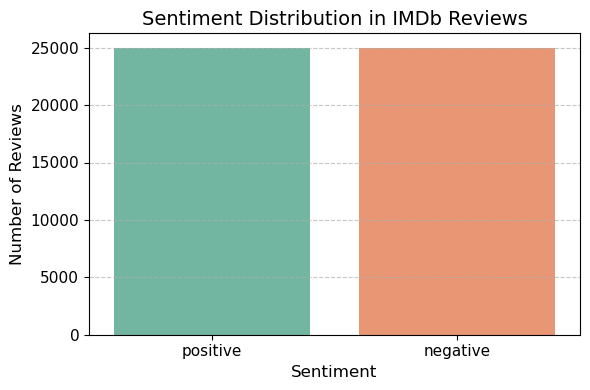

In [24]:
# Showing distribution of Sentiments

plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df, palette='Set2')

plt.title('Sentiment Distribution in IMDb Reviews', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [30]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """Optimized function to clean and preprocess text"""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"<br\s*/?>", " ", text)  # Remove <br> tags
    text = re.sub(r"\bbr\b", " ", text)  # Remove standalone 'br'
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = regexp_tokenize(text, pattern=r'\s+', gaps=True)  # Tokenization using regex
    tokens = (lemmatizer.lemmatize(word) for word in tokens if word not in stop_words)  # Stopword removal + Lemmatization
    return " ".join(tokens)


# Apply preprocessing
df['cleaned_text'] = df['review'].apply(preprocess_text)

# TASK 2: FEATURE ENGINEERING

In [38]:
# Convert sentiment labels to numerical values (0 = Negative, 1 = Positive)
df["sentiment_encoded"] = df["sentiment"].map({"negative": 0, "positive":1})

# Feature Engineering
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['sentiment'].map({'positive': 1, 'negative': 0})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TASK 3: MODEL DEVELOPMENT

Logistic Regression Accuracy: 0.8857
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



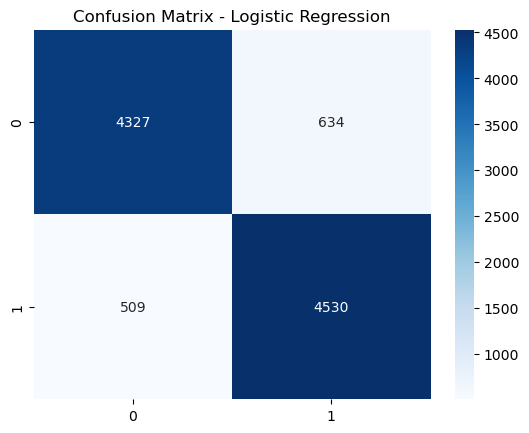

Logistic Regression ROC-AUC Score: 0.9576


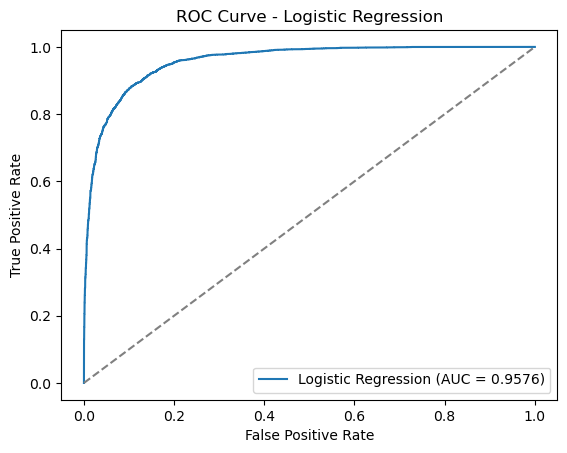

Naive Bayes Accuracy: 0.8530
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



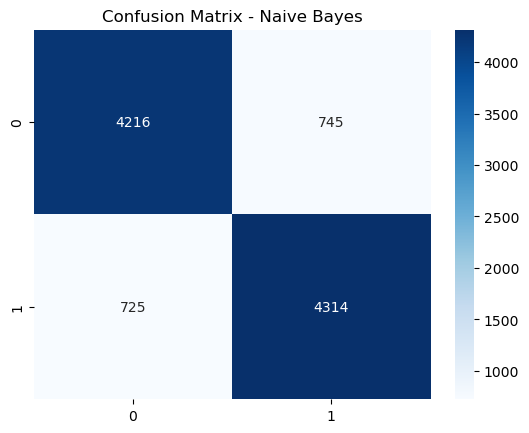

Naive Bayes ROC-AUC Score: 0.9289


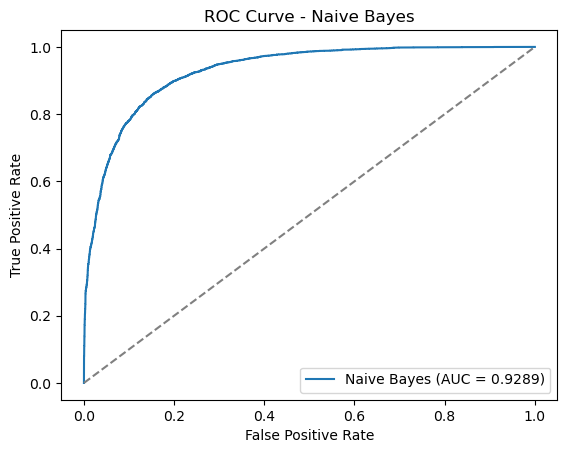

In [40]:
# Model Training and Evaluation
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
    
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print(f"{model_name} ROC-AUC Score: {roc_auc:.4f}")
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.show()

models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    
}

for name, model in models.items():
    train_and_evaluate_model(model, name)

# TASK 4: MODEL EVALUATION

Random Forest Accuracy: 0.8502
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4961
           1       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



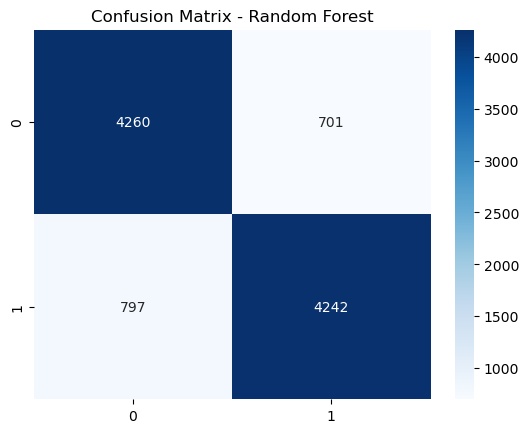

Random Forest ROC-AUC Score: 0.9299


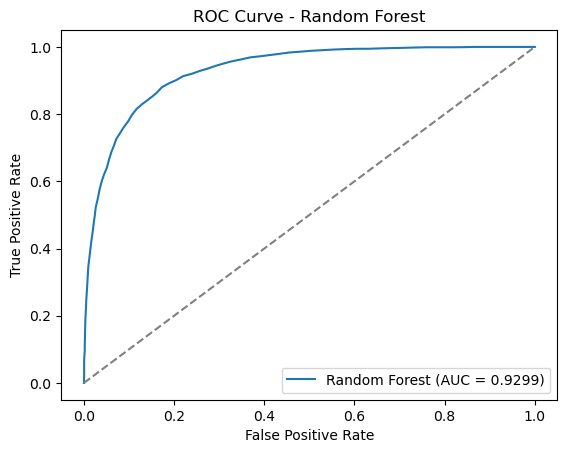

In [42]:
# Model Training and Evaluation for random forest
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Get probability scores for ROC-AUC

    # Print Metrics
    print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # ROC-AUC Score
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print(f"{model_name} ROC-AUC Score: {roc_auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.show()

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)   
}

for name, model in models.items():
    train_and_evaluate_model(model, name)

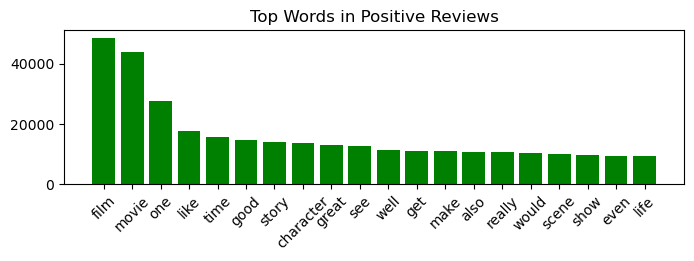

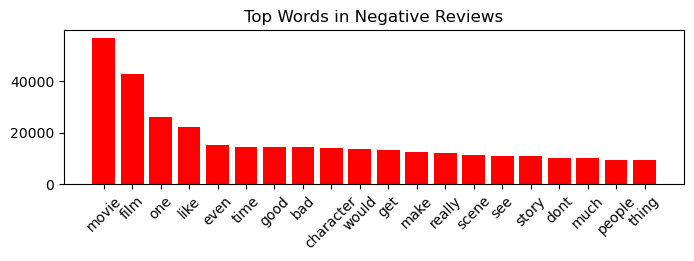

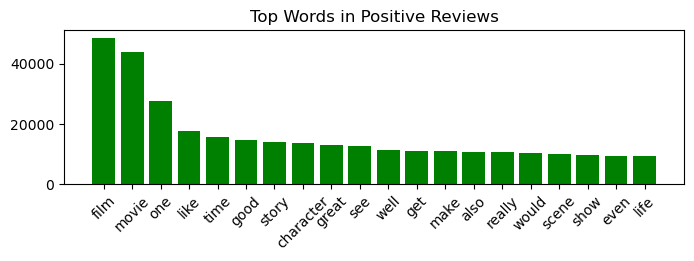

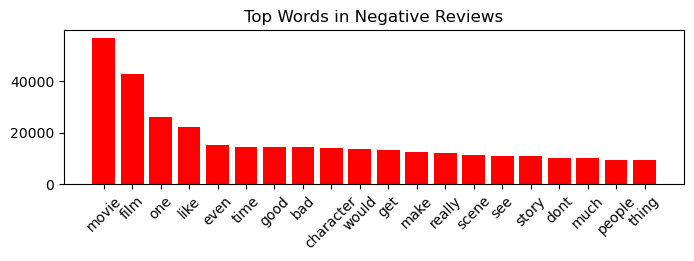

In [43]:
# Sentiment Analysis Insights
# Word Frequency Analysis
positive_reviews = " ".join(df[df['sentiment'] == 'positive']['cleaned_text'])
negative_reviews = " ".join(df[df['sentiment'] == 'negative']['cleaned_text'])

positive_words = Counter(positive_reviews.split()).most_common(20)
negative_words = Counter(negative_reviews.split()).most_common(20)

plt.figure(figsize=(8, 2))
plt.bar(*zip(*positive_words), color='green')
plt.xticks(rotation=45)
plt.title("Top Words in Positive Reviews")
plt.show()

plt.figure(figsize=(8, 2))
plt.bar(*zip(*negative_words), color='red')
plt.xticks(rotation=45)
plt.title("Top Words in Negative Reviews")
plt.show()# Sentiment Analysis Insights
# Word Frequency Analysis
positive_reviews = " ".join(df[df['sentiment'] == 'positive']['cleaned_text'])
negative_reviews = " ".join(df[df['sentiment'] == 'negative']['cleaned_text'])

positive_words = Counter(positive_reviews.split()).most_common(20)
negative_words = Counter(negative_reviews.split()).most_common(20)

plt.figure(figsize=(8, 2))
plt.bar(*zip(*positive_words), color='green')
plt.xticks(rotation=45)
plt.title("Top Words in Positive Reviews")
plt.show()

plt.figure(figsize=(8, 2))
plt.bar(*zip(*negative_words), color='red')
plt.xticks(rotation=45)
plt.title("Top Words in Negative Reviews")
plt.show()

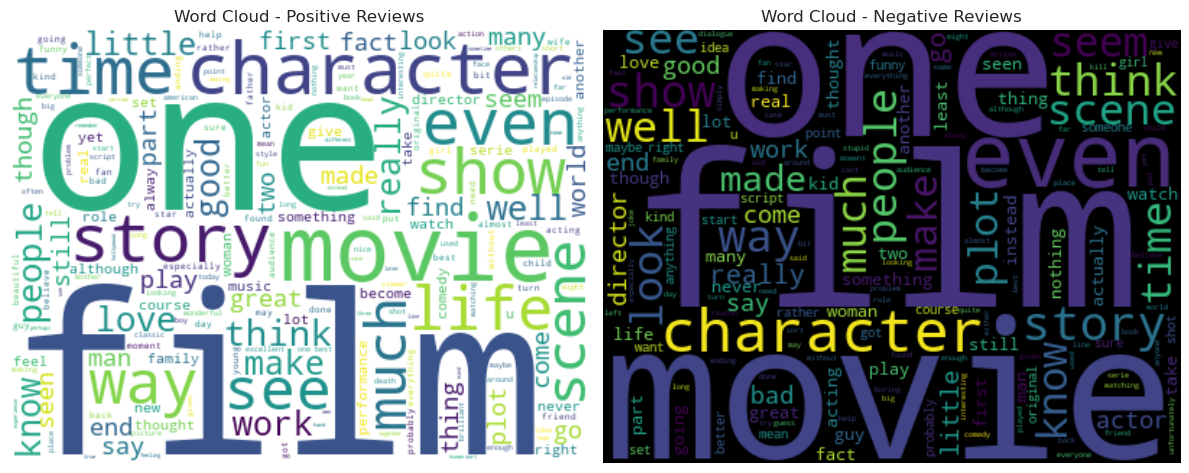

In [100]:
# Word Cloud for Positive and Negative Reviews
positive_reviews = " ".join(df[df["sentiment"] == "positive"]["cleaned_review"])
negative_reviews = " ".join(df[df["sentiment"] == "negative"]["cleaned_review"])
plt.figure(figsize=(12, 6))

# Positive Reviews (Left)
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=400, height=300, background_color='white').generate(positive_reviews)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Positive Reviews")

# Negative Reviews (Right)
plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=400, height=300, background_color='black').generate(negative_reviews)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Negative Reviews")
plt.tight_layout() # Added to prevent title overlap
plt.show()

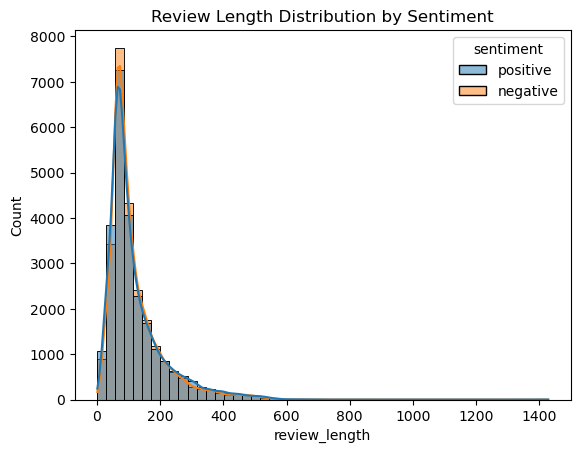

In [46]:
# Review Length Analysis
df['review_length'] = df['cleaned_text'].apply(lambda x: len(x.split()))
sns.histplot(data=df, x='review_length', hue='sentiment', bins=50, kde=True)
plt.title("Review Length Distribution by Sentiment")
plt.show()

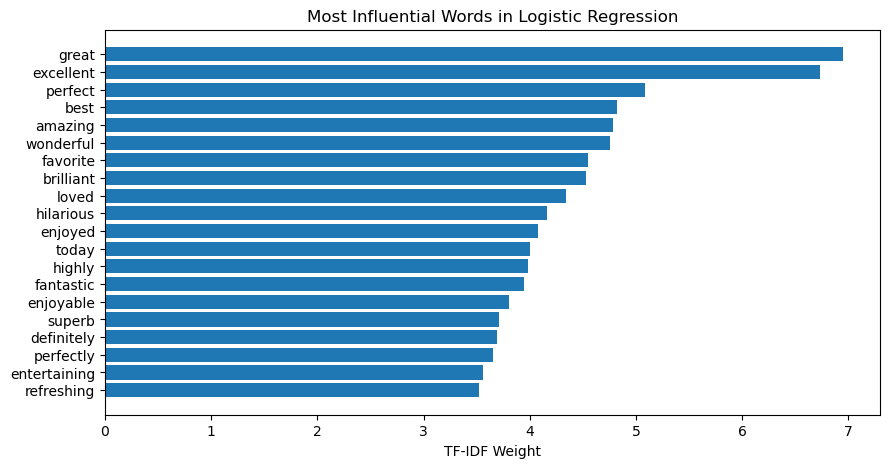

In [48]:
# TF-IDF Weight Distribution for Logistics Regression 
feature_names = vectorizer.get_feature_names_out()
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
logreg_coeffs = lr_model.coef_.flatten()
top_tfidf_indices = np.argsort(logreg_coeffs)[-20:]
plt.figure(figsize=(10, 5))
plt.barh(np.array(feature_names)[top_tfidf_indices], logreg_coeffs[top_tfidf_indices])
plt.xlabel("TF-IDF Weight")
plt.title("Most Influential Words in Logistic Regression")
plt.show()

# Insights regarding the whole model 

After observing the results of the 3 algorithms that I tried, I found out that:
- Logistic regression has better accuracy, precision, recall, f1-score and ROC-AUC score than the rest of the algorithm.
- So, the TDF-IDF weight distribution was based on Logistic regression scores. 
- Also the SVM algorithm taking too long to execute, so after trying it many times, I decided not to include it. 

# NOTE:- **I have taken all the help that's necessary and useful from ChatGPT.**